# Image Classification with CNN using Keras

# Import Libraries

In [1]:
# Because there is no cifar10 data set on this machine, when downloading cifar10, 
# Certificate verify failed: the error message certificate has expired appears.
# Later, I found that the following two lines can be added to the file header:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('GPU available:',tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.9.1
GPU available: []


# Preprocess Data

In [3]:
def get_classes(x, y):
    # GET INDEX WHERE Y = 0,1,2
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    indices_3, _ = np.where(y == 3.)
    indices_4, _ = np.where(y == 4.)
    indices_5, _ = np.where(y == 5.)
    indices_6, _ = np.where(y == 6.)
    indices_7, _ = np.where(y == 7.)
    indices_8, _ = np.where(y == 8.)
    indices_9, _ = np.where(y == 9.)

    # CONCATENATING THESE INDIVIDUAL INDICES
    indices = np.concatenate([indices_0, indices_1, indices_2, indices_3, indices_4,
                                  indices_5, indices_6, indices_7, indices_8, indices_9], axis=0)
    
    # GETTING FEATURES AND LABELS OF ALL OF THESE INDICES
    x = x[indices]
    y = y[indices]
    
    # GETTING NUMBER OF DATA POINTS
    count = x.shape[0]
    # SHUFFLING THESE DATA POINTS WITHOUT REPLACING IT(THUS, ALL UNIQUE)
    indices = np.random.choice(range(count), count, replace=False)
    
    # GETTING SHUFFLED FEATURES AND LABELS
    x = x[indices]
    y = y[indices]
    
    # CONVERTING LABELS TO ONE HOT ENCODED LABELS
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [4]:
# LOADING THE DATA
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

# GETTING THREE FEATURES
X_train, Y_train = get_classes(X_train, Y_train)
X_test, Y_test = get_classes(X_test, Y_test)

In [5]:
print(X_train.shape,'\n',Y_train.shape)

(50000, 32, 32, 3) 
 (50000, 10)


In [6]:
print(X_test.shape,'\n',Y_test.shape)

(10000, 32, 32, 3) 
 (10000, 10)


# Visualize Examples

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',	'dog', 'frog', 'horse', 'ship', 'truck']


def show_examples(x, y, p):
    # DISPLAYING 10 EXAMPLES
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)

    x = x[indices]
    y = y[indices]
    p = p[indices]

    plt.figure(figsize=(20, 10))
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])

        # IF PREDICTION WAS CORRECT THEN COL IS GREEN
        col = 'green' if (np.argmax(y[i]) == np.argmax(y[i])) else 'red'

        plt.xlabel(class_names[np.argmax(p[i])], color=col)

    plt.show()


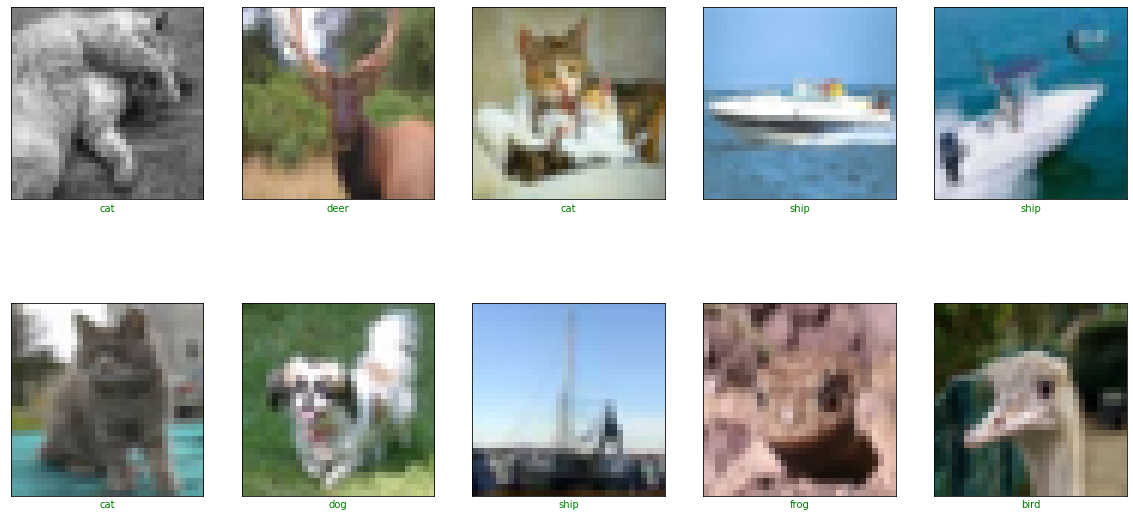

In [8]:
show_examples(X_train, Y_train, Y_train)

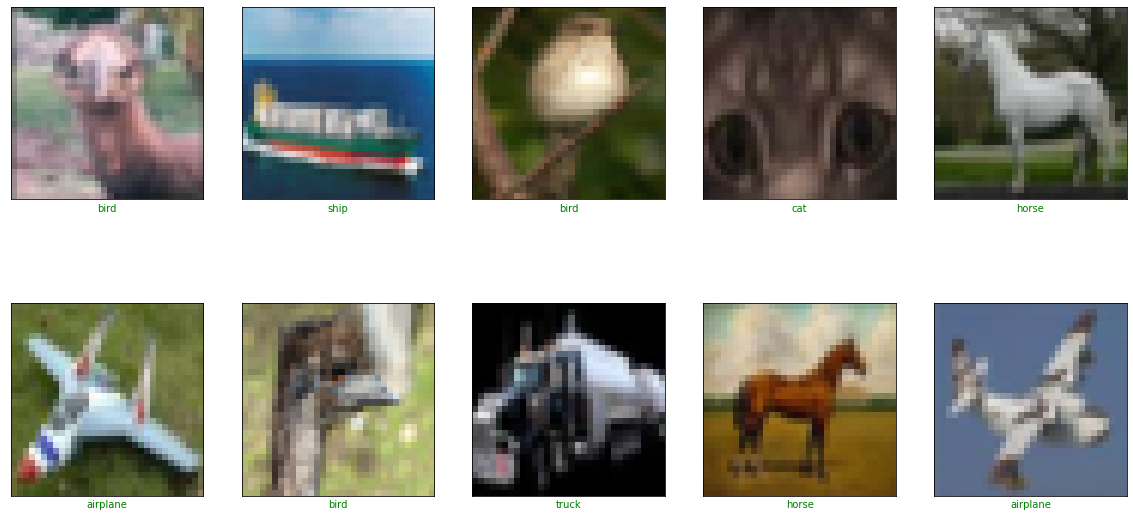

In [9]:
show_examples(X_test, Y_test, Y_test)

# Create Model

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [11]:
def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation="relu", padding="same"))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation="relu"))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32,32, 3)))
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))


    model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

# Train the Model

In [13]:
history = model.fit(X_train/255, Y_train, validation_data=(X_test/255, Y_test),
                    epochs=50, batch_size=128,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10),
                        tf.keras.callbacks.ModelCheckpoint("models/model_{val_accuracy:.3f}.h5",
                        save_best_model=True, save_weights_only=False, monitor='val_accuracy')
                    ])


Epoch 1/50
187/391 [=============>................] - ETA: 1:02 - loss: 2.1008 - accuracy: 0.2806

# Final Predictions

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(len(acc)), acc, label = 'Accuracy')
plt.plot(range(len(val_acc)), val_acc, label = 'Val_Accuracy')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('models/model_0.947.h5')

In [ ]:
preds = model.predict(X_test/255)
show_examples(X_test, Y_test, preds)

In [ ]:
# WE ARE DONE!